# PROYECTO 
# Diego Valle 
# Carné: 20003022 

## Instalando paquetes
Se instalan a continuación el paquete scikit-learn, seaborn

pip install -U scikit-learn

pip install seaborn

Iniciamos con la carga de los datos, para lo cual debemos llamar a **numpy** y tenerlo en la variable np

In [1]:
import numpy as np

In [4]:
import pandas as pd

In [25]:
X=np.array(np.load('proyecto_training_data.npy'))

Se realiza el slicing con Numpy para crear dos datasets

In [35]:
divideDatos=(int(X.size*0.8))
print("Se dividirá en 80% y 20% de los datos, quedando ")
print(divideDatos, " datos en entrena y ")
print((X.size-divideDatos), " para validar")
entrena, valida=X[:7007,:], X[7008:,:]

Se dividirá en 80% y 20% de los datos, quedando 
7008  datos en entrena y 
1752  para validar


Colocando datos en Dataframe de Pandas

In [51]:
EntrenaPandas=pd.DataFrame(entrena,columns=['SalesPrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
EntrenaPandas.astype({"SalesPrice": float, "OverallQual":int, "1stFlrSF":float, "TotRmsAbvGrd":float, "YearBuilt":int, "LotFrontage":float})

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7,856.0,8.0,2003,65.0
1,181500.0,6,1262.0,6.0,1976,80.0
2,223500.0,7,920.0,6.0,2001,68.0
3,140000.0,7,961.0,7.0,1915,60.0
4,250000.0,8,1145.0,9.0,2000,84.0
...,...,...,...,...,...,...
1455,175000.0,6,953.0,7.0,1999,62.0
1456,210000.0,6,2073.0,7.0,1978,85.0
1457,266500.0,7,1188.0,9.0,1941,66.0
1458,142125.0,5,1078.0,5.0,1950,68.0


Mostrando datos estadísticos de resumen del dataset "entrena", en esta tabla se muestra la cantidad de elementos que contiene, la media, la desviación estándar, el mínimo, 20% 50% y 75%, además del valor máximo.

In [52]:
EntrenaPandas.describe()

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


Se procede a crear el histograma de cada variable

In [54]:
EntrenaPandas["SalesPrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalesPrice, Length: 1460, dtype: float64

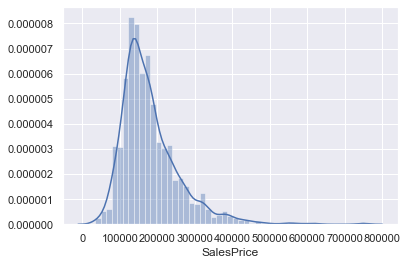

In [53]:
import seaborn as sns
sns.set()
SalesPrice=sns.distplot(EntrenaPandas["SalesPrice"])

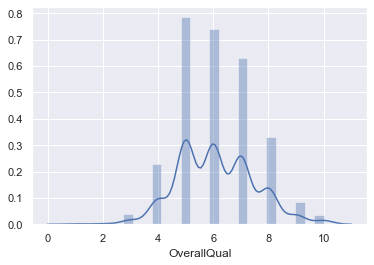

In [55]:
sns.set()
OverallQual=sns.distplot(EntrenaPandas["OverallQual"])

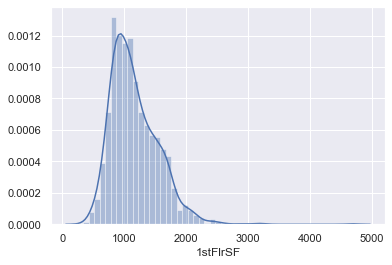

In [58]:
sns.set()
firstFloorSF=sns.distplot(EntrenaPandas["1stFlrSF"])

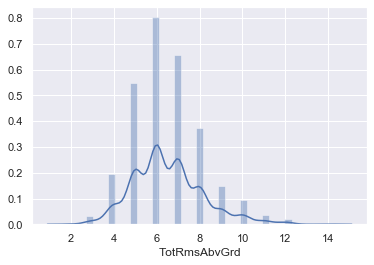

In [59]:
sns.set()
TotRmsAbvGrd=sns.distplot(EntrenaPandas["TotRmsAbvGrd"])

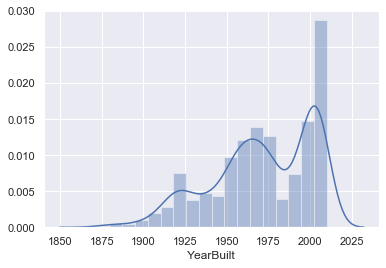

In [60]:
sns.set()
YearBuilt=sns.distplot(EntrenaPandas["YearBuilt"])

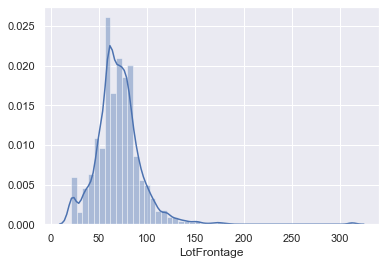

In [74]:
sns.set()
LotFrontageSinNaN=EntrenaPandas["LotFrontage"][~np.isnan(EntrenaPandas["LotFrontage"])]
SalesPriceSinNaN=EntrenaPandas["SalesPrice"][~np.isnan(EntrenaPandas["LotFrontage"])]
LotFrontage=sns.distplot(LotFrontageSinNaN)

## Calculando valores para las variables independientes

### Coeficiente de correlación

In [87]:
CCCalificacion=np.corrcoef(EntrenaPandas["SalesPrice"],EntrenaPandas["OverallQual"])[0,1]
CC1erPisoSF=np.corrcoef(EntrenaPandas["SalesPrice"],EntrenaPandas["1stFlrSF"])[0,1]
CCCuartos=np.corrcoef(EntrenaPandas["SalesPrice"],EntrenaPandas["TotRmsAbvGrd"])[0,1]
CCAnioConstruye=np.corrcoef(EntrenaPandas["SalesPrice"],EntrenaPandas["YearBuilt"])[0,1]
CCFrente=np.corrcoef(SalesPriceSinNaN,LotFrontageSinNaN)[0,1]
print("Coeficiente correlacion precio vs Calificacion: ",CCCalificacion)
print("Coeficiente correlacion precio vs Pies Cuadrados Primer Piso: ",CC1erPisoSF)
print("Coeficiente correlacion precio vs cantidad cuartos: ",CCCuartos)
print("Coeficiente correlacion precio vs año Construccion: " ,CCAnioConstruye)
print("Coeficiente correlacion precio vs Frente lote: ",CCFrente)

Coeficiente correlacion precio vs Calificacion:  0.7909816005838048
Coeficiente correlacion precio vs Pies Cuadrados Primer Piso:  0.6058521846919147
Coeficiente correlacion precio vs cantidad cuartos:  0.5337231555820284
Coeficiente correlacion precio vs año Construccion:  0.5228973328794969
Coeficiente correlacion precio vs Frente lote:  0.3517990965706781


### Graficando datos

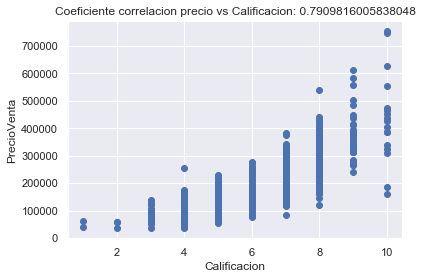

In [88]:
import matplotlib.pyplot as plt
plt.scatter(EntrenaPandas["OverallQual"],EntrenaPandas["SalesPrice"])
tituloCalificacion="Coeficiente correlacion precio vs Calificacion: "+str(CCCalificacion)
plt.title(tituloCalificacion)
plt.xlabel("Calificacion")
plt.ylabel("Precio Venta")
plt.show()

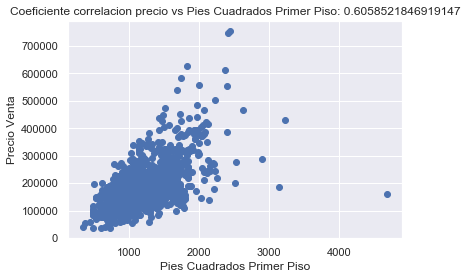

In [101]:
plt.scatter(EntrenaPandas["1stFlrSF"],EntrenaPandas["SalesPrice"])
tituloPiesCuadrados="Coeficiente correlacion precio vs Pies Cuadrados Primer Piso: "+str(CC1erPisoSF)
plt.title(tituloPiesCuadrados)
plt.xlabel("Pies Cuadrados Primer Piso")
plt.ylabel("Precio Venta")
plt.show()

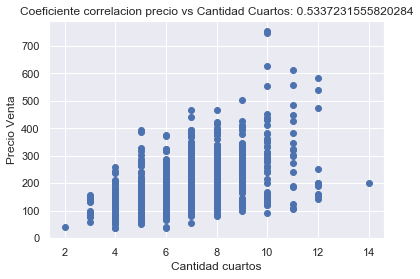

In [92]:
plt.scatter(EntrenaPandas["TotRmsAbvGrd"],EntrenaPandas["SalesPrice"])
tituloCantidadCuartos="Coeficiente correlacion precio vs Cantidad Cuartos: "+str(CCCuartos)
plt.title(tituloCantidadCuartos)
plt.xlabel("Cantidad cuartos")
plt.ylabel("Precio Venta")
plt.show()

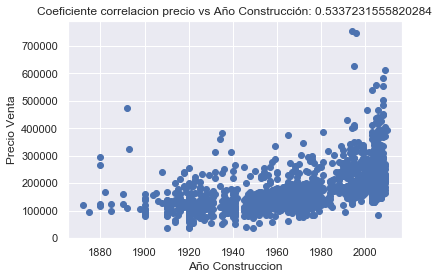

In [102]:
plt.scatter(EntrenaPandas["YearBuilt"],EntrenaPandas["SalesPrice"])
tituloAnioConstruye="Coeficiente correlacion precio vs Año Construcción: "+str(CCAnioConstruye)
plt.title(tituloAnioConstruye)
plt.xlabel("Año Construccion")
plt.ylabel("Precio Venta")
plt.show()

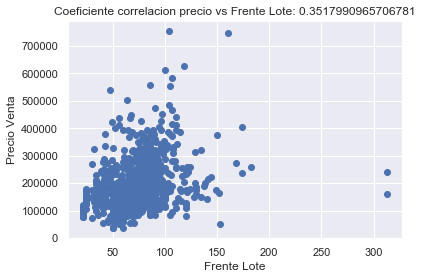

In [103]:
plt.scatter(LotFrontageSinNaN,SalesPriceSinNaN)
tituloFrenteLote="Coeficiente correlacion precio vs Frente Lote: "+str(CCFrente)
plt.title(tituloFrenteLote)
plt.xlabel("Frente Lote")
plt.ylabel("Precio Venta")
plt.show()